In [2]:
## We import standard libraries that provide required functionality such as random numbers, averaging and plotting

import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.sparse import spdiags,linalg,eye

In [35]:
##----------------------------------------------------------------------
##  Here we define some functions that will be used in the main code
##----------------------------------------------------------------------

def initialstate(L):
    '''
    Generates a random spin configuration for initial condition
    '''
    state = 2*np.random.randint(2, size=(L,L))-1
    return state


def mcmove(config, beta):
    '''
    Here we perform successive Monte Carlo updates of the microstates. 
    We choose a spin at random and propose to flip it to the 'other' state. 
    The proposal is accepted or rejected depending on the energy change associated with the flip.
    If the energy change of a flip is negative (ie the energy decreases) we always accept the proposed flip. 
    If the energy change is positive we accept the proposal with a probability dependent on the Boltzmann factor for the energy change.
    '''

    for i in range(L):
        for j in range(L):
                a = np.random.randint(0, L)
                b = np.random.randint(0, L)
                s =  config[a, b]
                nb = config[(a+1)%L,b] + config[a,(b+1)%L] + config[(a-1)%L,b] + config[a,(b-1)%L]
                cost = 2*s*nb

                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


def calcEnergy(config):
    '''
    Calculates the total energy of a given configuration, ie it calculates the energy macrostate associated with a given microstate.
    '''
    energy = 0

    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%L, j] + config[i,(j+1)%L] + config[(i-1)%L, j] + config[i,(j-1)%L]
            energy += -nb*S
    return energy/2.  # to compensate for over-counting


def calcMag(config):
    '''
    Calculates the total magnetization of a given configuration, ie it calculates the magnetisation macrostate associated with a given microstate.
    '''
    mag = np.sum(config)
    return mag


def microstatePlot(config, i, L, T):
    ''' This modules plts the microstate once passed to it along with time etc '''
    X, Y = np.meshgrid(range(L), range(L))
    plt.pcolormesh(X, Y, config, cmap=plt.cm.RdBu);
    plt.title('Temperature={:.2f}, Time={}'.format(T,i)); 
    plt.axis('tight')
    plt.show()

In [38]:
#----------------------------------------------------------------------
## Simulation parameters: Here we set (and can change) various parameters
#----------------------------------------------------------------------

nt      = 16          #  number of temperature points
L       = 10          #  size of the lattice, L x L
eqSteps = 2**9        #  number of MC sweeps for equilibration
mcSteps = 2**12       #  number of MC sweeps for calculation

T       = np.linspace(1.5, 4.0, nt);
E,M,C,X = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n1, n2  = 1.0/(mcSteps*L*L), 1.0/(mcSteps*mcSteps*L*L)
# factors for dividing by number of samples, and by system size to get intensive values

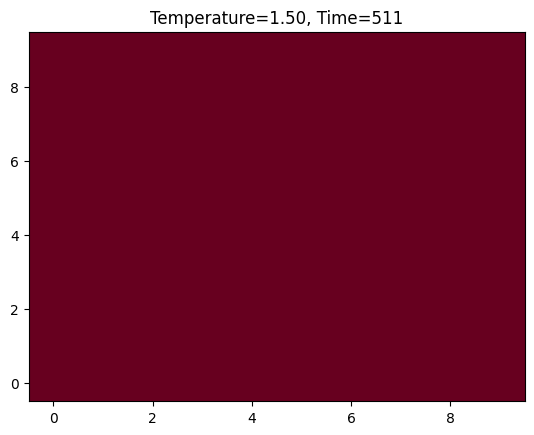

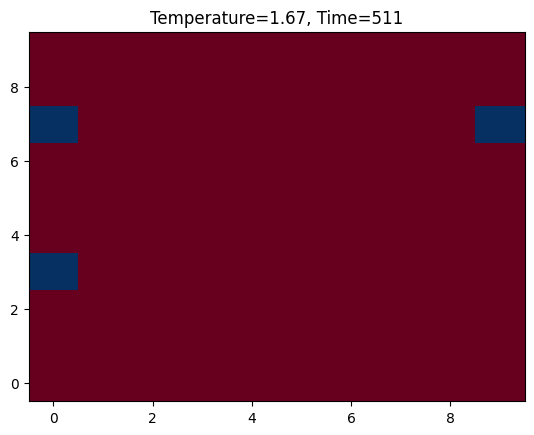

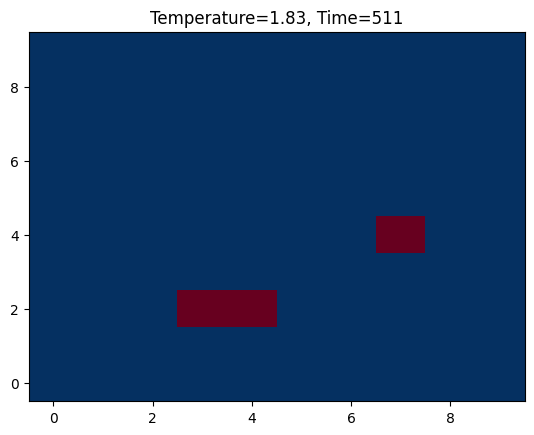

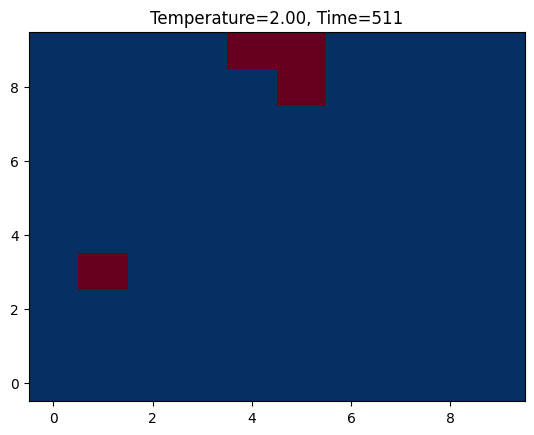

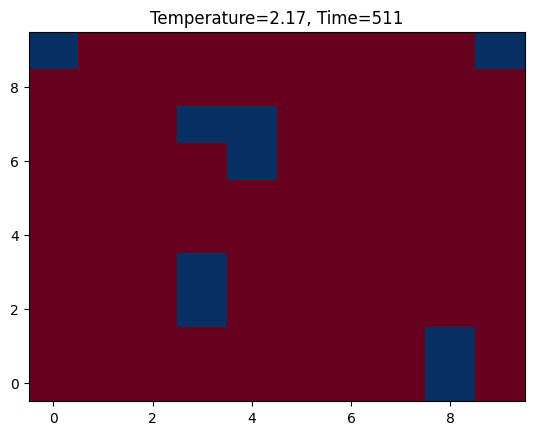

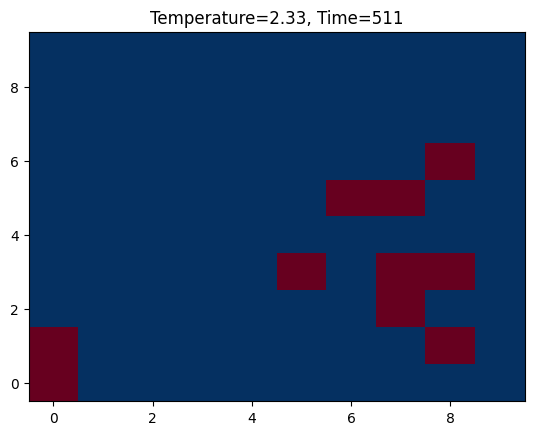

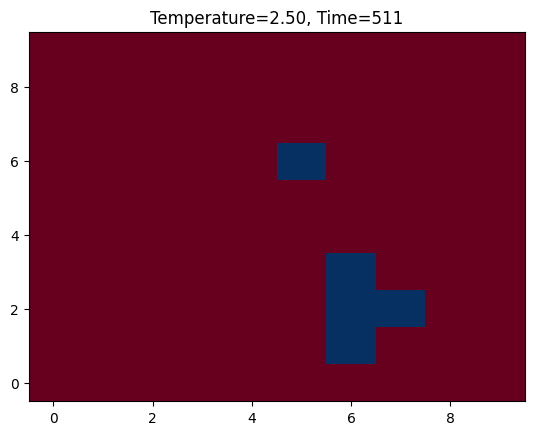

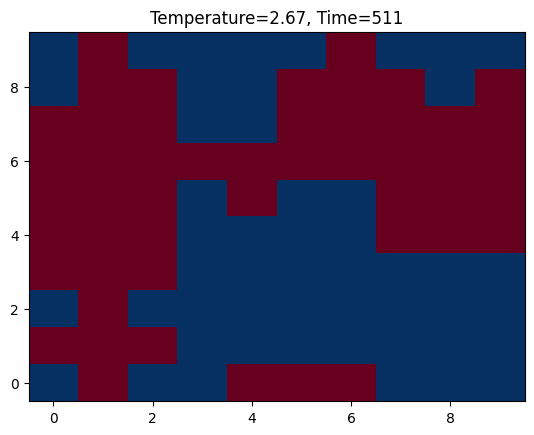

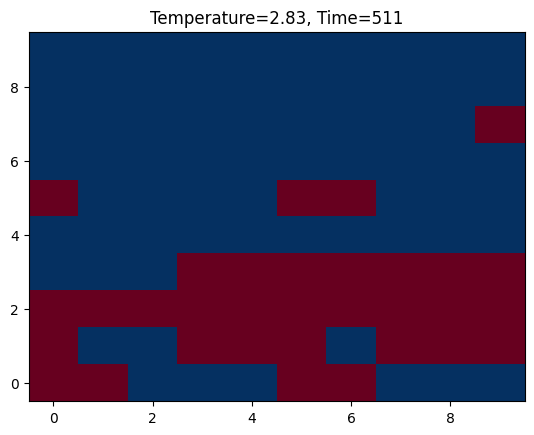

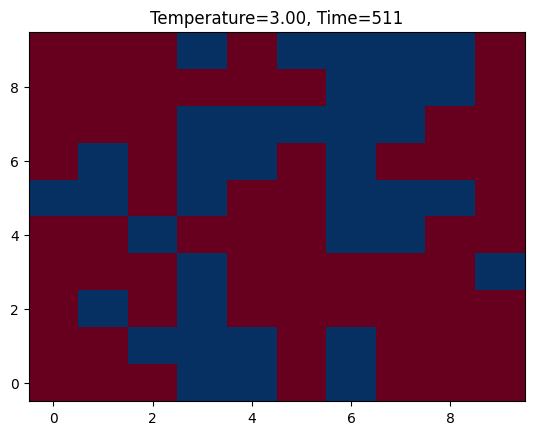

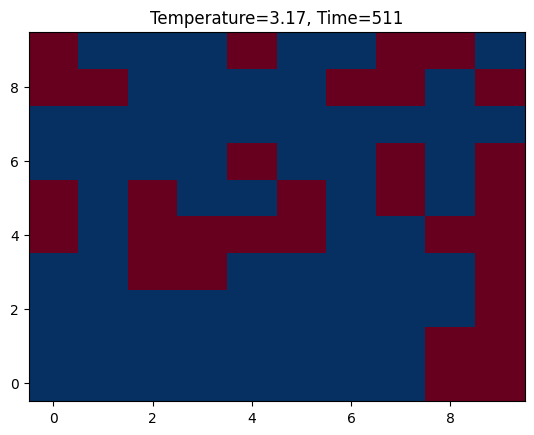

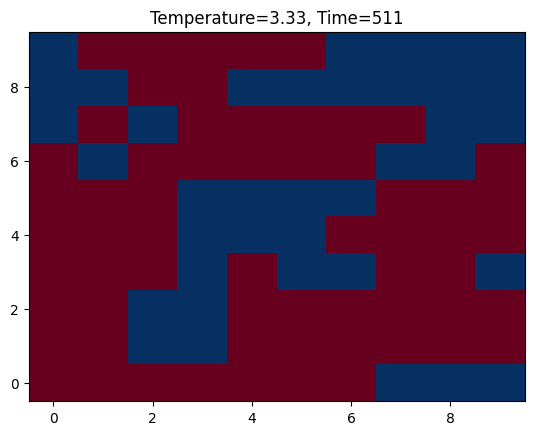

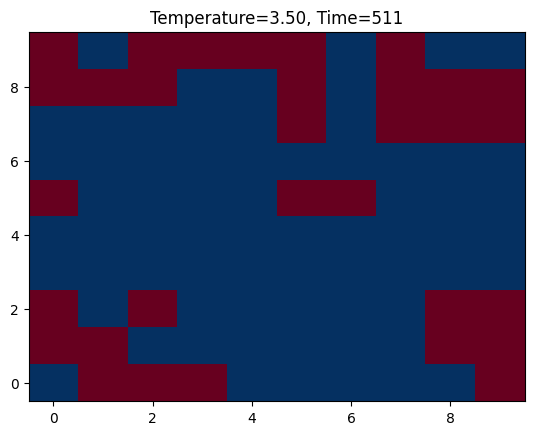

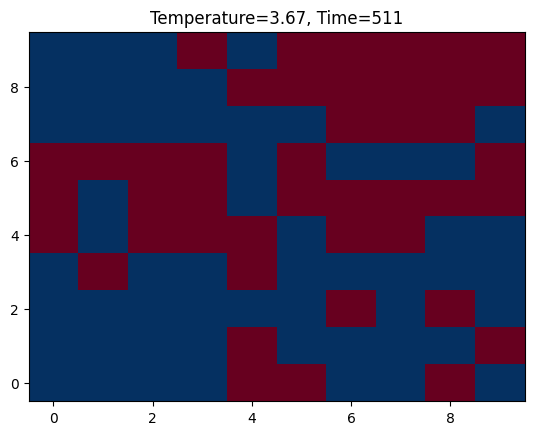

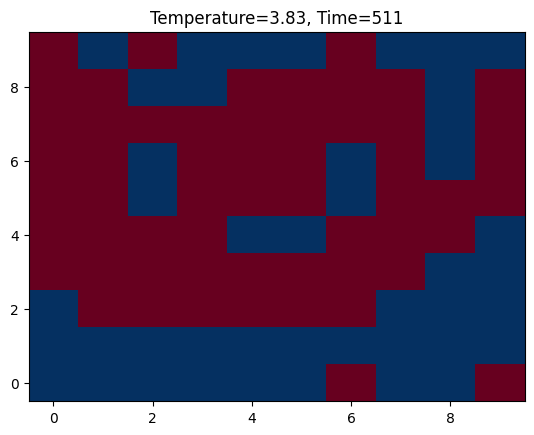

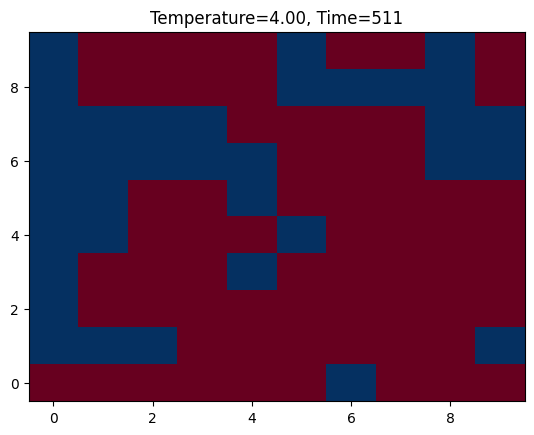

In [ ]:
#----------------------------------------------------------------------
#  Main Loop
#----------------------------------------------------------------------


for tt in range(nt):
    config = initialstate(L)         # initialise

    E1 = M1 = E2 = M2 = 0
    iT=1.0/T[tt]; iT2=iT*iT;         # Note that for convenience we set Boltzmann's constant k_B=1

    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves
    microstatePlot(config, i, L, T[tt]);
    
    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag

    
    # Calculate intensive per-spin average quantities 
    E[tt] = n1*E1
    M[tt] = n1*M1
 



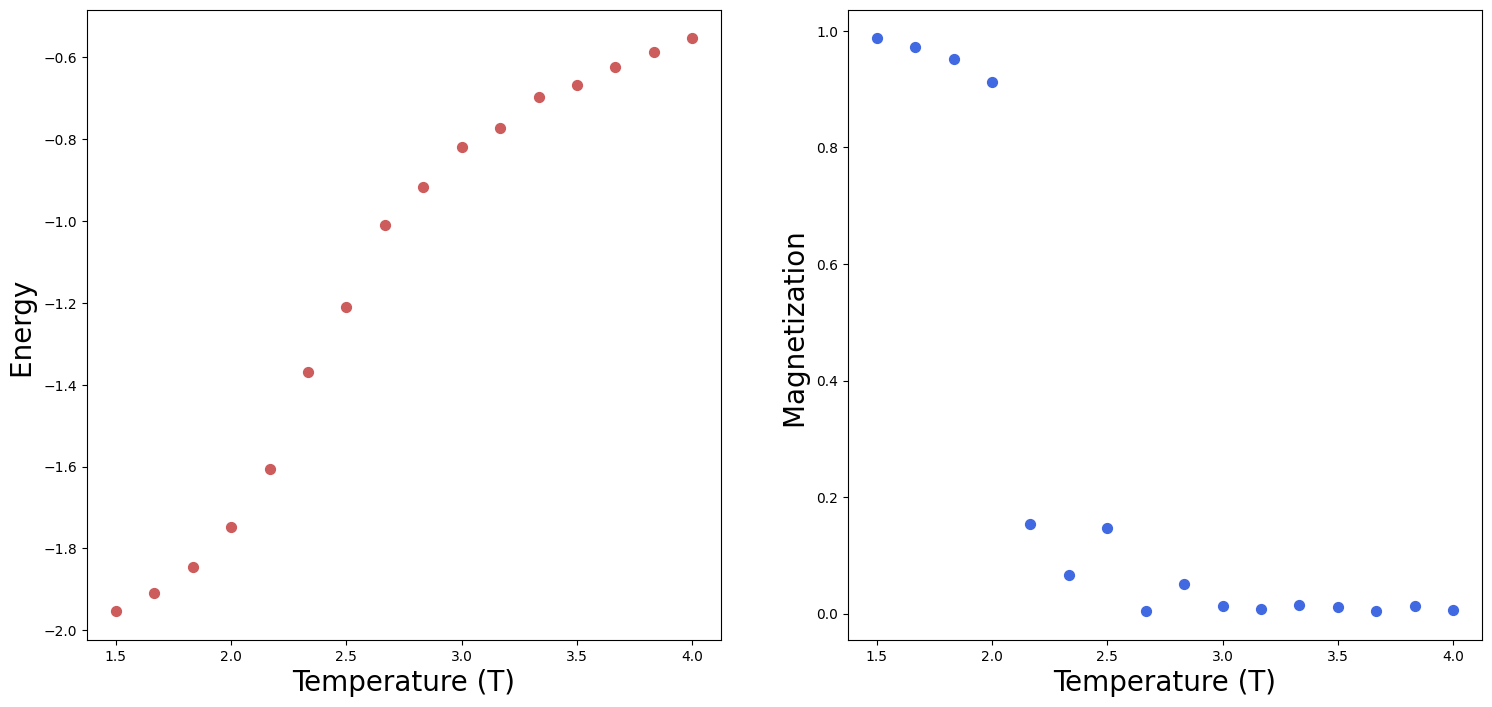

In [ ]:
#----------------------------------------------------------------------
#  plot the calculated values
#----------------------------------------------------------------------

f = plt.figure(figsize=(18, 18)); #


sp =  f.add_subplot(2, 2, 1 );
plt.scatter(T, E, s=50, marker='o', color='IndianRed')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);         plt.axis('tight');


sp =  f.add_subplot(2, 2, 2 );
plt.scatter(T, abs(M), s=50, marker='o', color='RoyalBlue')
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);   plt.axis('tight');

